In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from segysak.segy import (
    get_segy_texthead,
    segy_header_scan,
    segy_header_scrape,
)
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from dask.distributed import Client

client = Client()
client

c:\projects\quick_pp\.venv\Lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50509 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:50509/status,
Dashboard: http://127.0.0.1:50509/status,Workers: 4
Total threads: 12,Total memory: 31.10 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50512,Workers: 0
Dashboard: http://127.0.0.1:50509/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:50540,Total threads: 3
Dashboard: http://127.0.0.1:50541/status,Memory: 7.78 GiB
Nanny: tcp://127.0.0.1:50515,


In [4]:
import pathlib

V3D_path = pathlib.Path(r"data\01_raw\VOLVE\seismic\ST10010\Stacks\ST10010ZC11_PZ_PSDM_KIRCH_FULL_T.MIG_FIN.POST_STACK.3D.JS-017536.segy")
seisnc = xr.open_dataset(
    V3D_path,
    # engine="netcdf4",
    dim_byte_fields={"iline": 189, "xline": 193},
    extra_byte_fields={"cdp_x": 181, "cdp_y": 185},
)

seisnc.segysak.scale_coords()

print(seisnc.seis.humanbytes)
print(seisnc.chunks)

Processing Chunks:   0%|          | 0.00/3.00 [00:00<?, ? trace-chunks/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/88.7k [00:00<?, ? traces/s]

940.58 MB
Frozen({})


In [5]:
get_segy_texthead(V3D_path)

Text HeaderC01 CLIENT : STATOIL                              PROCESSED BY: WESTERNGECO     
C02 AREA   : VOLVE, BLOCK 15/9,  NORTH SEA - ST10010     SURVEY: 3D 4C 0BC      
C03 3D FULL AREA POST-STACK FINAL PSDM                       DATE: 2011-10-26   
C04 DATA FORMAT: SEGY       DATA TYPE: STACK-FULL ANGLE, 3-41 DEGREES (T)       
C05 ---------------------AQUISITION PARAMETRS---------------------------------- 
C06 DATA SHOT BY VESSEL: M/V SANCO SPIRIT & VIKLAND  CABLE LENGTH:6000 M        
C07 NO OF GROUPS: 960/P,X,Y,Z.  NO OF CABLES: 8  ARRAY VOL/SOURCE: 3990 CU IN.  
C08 GROUP INTERVAL: 25M  SHOT INTERVAL: 25M (FLIP-FLOP)  RECORD LENGTH: 10000 MS
C09 GEODECTIC DATUM:  ED50      SPHEROID: INTERNAT 1924     PROJECTION: UTM     
C10  UTM ZONE: 31 N                                                             
C11 FIRST SAMPLE: 4 MS     LAST SAMPLE: 3400 MS     SAMPLE INTERVAL: 4 MS       
C12 NAVIGATION SOURCE P1/90 UKOOA, SPS                                          
C13 ----------------------PROCESSING SEQUENCE---------------------------------- 
C14 REFORMAT, RESAMPLING TO 4MS                                                 
C15 Z TO P AMP. MATCHING AND DESIGNATURE APPLIED                                
C16 TIDAL STATIC CORRECTION, NOISE ATTENUATION                                  
C17 PZ CALIBRATION & SUMMATION                                                  
C18 DIRECT ARRIVAL REMOVAL (SHOT & RECEIVER DOMAIN)                             
C19 LINEAR NOISE ATTENUATION (RECEIVER DOMAIN), OFFSET REGULARIZATION           
C20 SINGLE BOUNCE DECON IN TAU-PQ DOMAIN                                        
C21 DETERMINISTIC WATER DEMULTIPLE, PrSDM (2011 VELOCITY MODEL),                
C22 DEPTH TO TIME CONVERSION, RESIDUAL VELOCITY APPLIED, RADON DEMULTIPLE       
C23  ANGLE MUTE (3-41 DEGREES), STACK,  MODEL BASED DEMULTIPLE                  
C24 INVERSE_Q (100),  RANDOM NOISE ATTENUATION, 12.5X12.5 INTERPOLATION         
C25 BPF 70Hz 50dB/OCT HIGH-CUT, OUTPUT SEGY FORMAT                              
C26 ----------------------PROCESSING GRID INFORMATION-------------------------  
C27 INLINE  BIN SIZE: 12.5M   CROSSLINE BIN SIZE: 12.5M  AZIMUTH: 284 DEGREES   
C28 INLINE NUMBER INCREMENT:1       CROSSLINE  NUMBER INCREMENT:1               
C29 PG1   X: 439272.97   Y: 6475068.89   IL:   9961   XL: 1881                  
C30 PG2   X: 429582.21   Y: 6477485.37   IL:   9961   XL: 2680                  
C31 PG3   X: 440588.57   Y: 6480344.84   IL: 10396   XL: 1881                   
C32 PG4   X: 430897.81   Y: 6482761.32   IL: 10396   XL: 2680                   
C33                                                                             
C34 ----------------------HEADER WORD POSITIONS-------------------------------- 
C35 3D INLINE  BYTES 189-192             ¦  3D CROSS LINE   BYTES 193-196       
C36 BIN CENTRE UTM-X  BYTES 181-184.  ¦  BIN CENTRE UTM-Y  BYTES 185-188        
C37 CMP BYTES 21-24                                                             
C38 ALL COORDINATE VALUES ARE MULTIPLIED BY 100                                 
C39                                                                             
C40 END EBCDIC

In [6]:
import pandas as pd

well_survey = pd.read_csv(r"data\01_raw\VOLVE\VOLVE_15-9_Surveys.csv")

well_survey.head()

,MD (m RKB),Inc (deg),Azim (deg),TVD (m RKB),X-Offset (m),Y-Offset (m),UTM E/W (m),UTM N/S (m),DLS (deg/30m),WELL_NAME
0,109.00,0.00,0.00,109.00,7.02,6.89,437506.858,6477887.468,0.00,15-9-19-A
1,122.95,0.07,171.71,122.96,6.99,6.84,437506.828,6477887.418,0.15,15-9-19-A
2,133.00,0.08,251.27,132.98,6.99,6.82,437506.828,6477887.398,0.29,15-9-19-A
3,142.96,0.08,250.91,142.96,7.01,6.81,437506.848,6477887.388,0.00,15-9-19-A
4,152.93,0.09,231.59,152.91,7.03,6.79,437506.868,6477887.368,0.09,15-9-19-A


In [7]:
from quick_pp.rock_physics.geophysics import *

# Extract seismic along well trajectory
# First prepare well coordinates dataframe
well_name = '15-9-19-BT2'
well_coords = well_survey[well_survey['WELL_NAME'] == well_name][
    ['MD (m RKB)', 'Inc (deg)', 'Azim (deg)', 'UTM E/W (m)', 'UTM N/S (m)', 'TVD (m RKB)']
]
well_coords.columns = ['md', 'incl', 'azim', 'x', 'y', 'z']


Seismic CDP coordinates:
CDP X range: 429588.2 to 439512.5
CDP Y range: 6475316.8 to 6482337.0


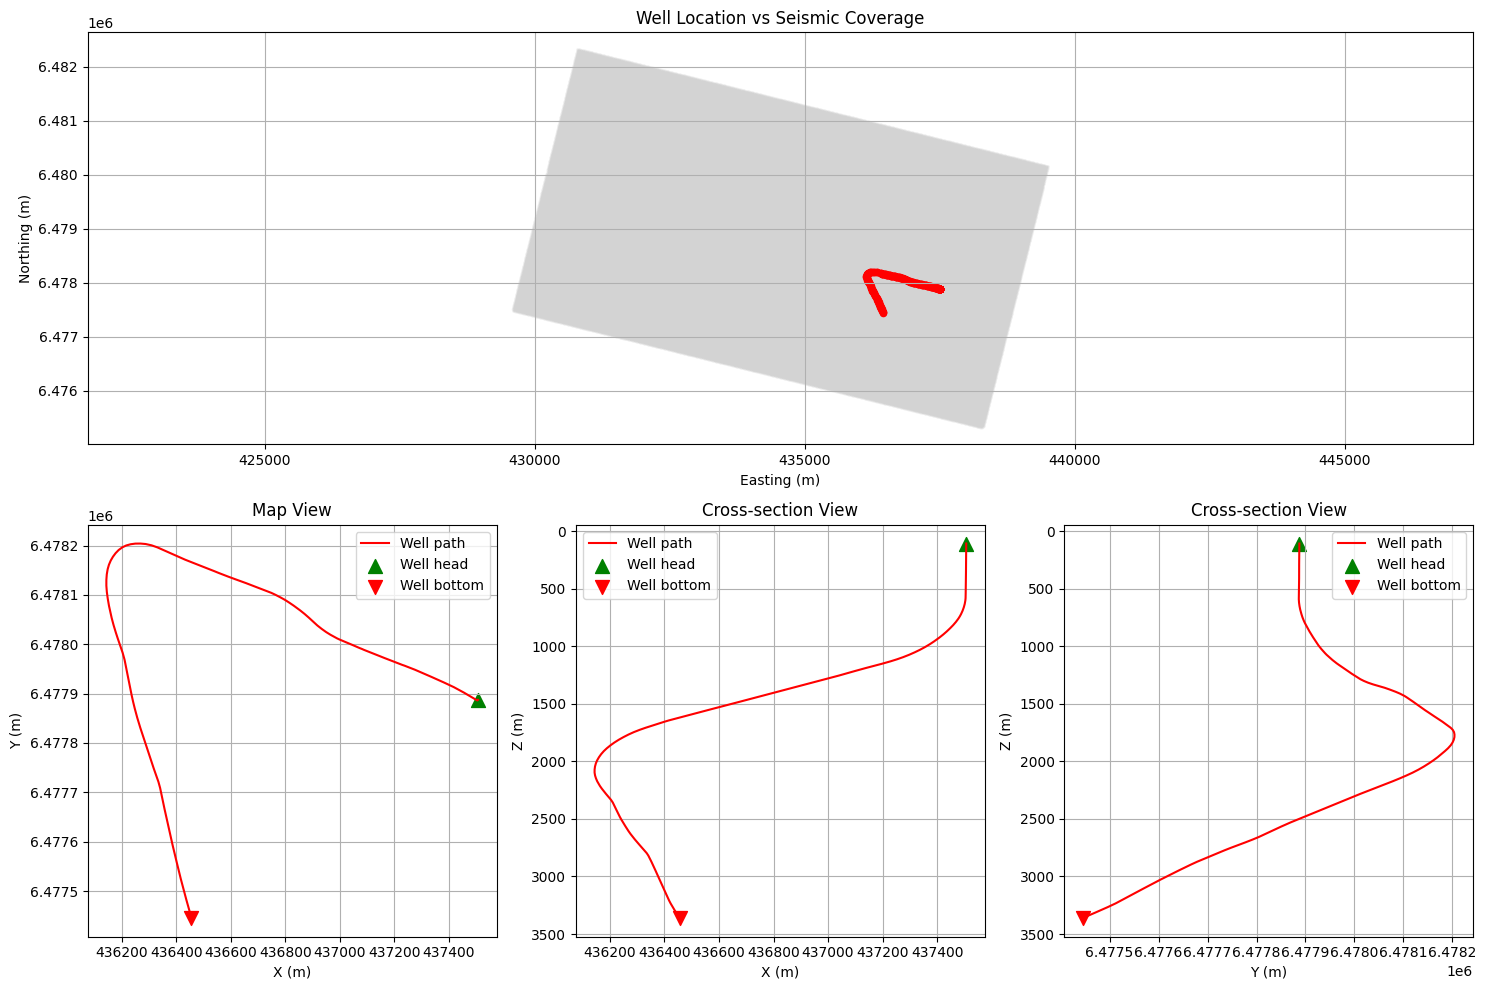

In [8]:
fig = plot_well_trajectory(seisnc, well_coords)

In [ ]:
fig = plot_seismic_along_well(seisnc, well_coords)

Error scaling coordinates: Coordinates already scaled.


In [ ]:
import quick_pp.las_handler as las

with open(rF'data\01_raw\VOLVE\{well_name}.las', 'rb') as f:
    df, header = las.read_las_files([f])

In [ ]:
clean_df = df.copy()
clean_df['GR'] = clean_df.GR.clip(0, 200)
clean_df = convert_md_to_tvd(clean_df, well_coords)

well_seismic = extract_seismic_along_well(seisnc, well_coords)
well_trace_df = well_seismic.to_dataframe().reset_index(names='DEPTH')
well_trace_df['TRACE'] = well_trace_df['data']
ref = pd.merge_asof(clean_df, well_trace_df, on='DEPTH', tolerance=0.1, direction='nearest')

ref = auto_identify_layers_from_seismic_trace(ref, 'zero_crossings')
# ref = calculate_reflectivity_from_layers(ref)
ref = calculate_reflectivity_each_step(ref)
ref.plot(x='TVD', y='REFLECTIVITY')

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(15, 5), sharex=True)
axs[0].plot(ref.TVD, ref.TRACE, label='TRACE')
axs[1].plot(ref.TVD, ref.LAYERS)
axs[2].plot(ref.TVD, ref.AI, label='AI')
# axs[2].plot(ref.AVG_AI, label='AVG_AI')
axs[2].legend()
axs[3].plot(ref.TVD, ref.REFLECTIVITY, label='Reflectivity')
axs[3].legend()

In [ ]:
W = optimize_wavelet(ref.TRACE, ref.REFLECTIVITY.fillna(0))

plt.plot(W[0], label='Wavelet')
plt.legend()

fig, axs = plt.subplots(2, 1, figsize=(15, 5), sharex=True)
axs[0].plot(ref.TVD, ref.TRACE, label='Seismic')
axs[0].plot(ref.TVD, W[2], label='Synthetic Seismic')
axs[0].legend()
axs[1].plot(ref.TVD, ref.REFLECTIVITY, label='Reflectivity')
axs[1].legend()